In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,recall_score, f1_score,roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, auc

In [2]:
# small model (Fine-tune)
tissue_list = ['Adipose_Subcutaneous','Artery_Tibial','Breast_Mammary_Tissue','Colon_Transverse','Nerve_Tibial','Testis','Thyroid']
model_size = 'small'
for tissue in tissue_list:

    print('\n')
    print(tissue)
    y_true = np.load('../model/pred_results_finetune/' + model_size + '_' + tissue + '_' + 'label.npy')
    y_pred = np.load('../model/pred_results_finetune/' + model_size + '_' + tissue + '_' + 'predict.npy')

    y_score = y_pred.argmax(axis=1)       
    test_label = y_true.argmax(axis=1)                         
    y_score_pro = y_pred # (212, 2)
    y_one_hot = y_true
    y_score_one_hot = to_categorical(y_score)
    print('accuracy:{}'.format(accuracy_score(test_label, y_score)))
    print('precision:{}'.format(precision_score(test_label, y_score)))
    print('recall:{}'.format(recall_score(test_label, y_score)))
    print('f1-score:{}'.format(f1_score(test_label, y_score)))
    



Adipose_Subcutaneous
accuracy:0.8205128205128205
precision:0.8947368421052632
recall:0.7727272727272727
f1-score:0.8292682926829269


Artery_Tibial
accuracy:0.8
precision:0.8260869565217391
recall:0.7916666666666666
f1-score:0.8085106382978724


Breast_Mammary_Tissue
accuracy:0.9583333333333334
precision:0.9411764705882353
recall:1.0
f1-score:0.9696969696969697


Colon_Transverse
accuracy:0.9696969696969697
precision:0.9333333333333333
recall:1.0
f1-score:0.9655172413793104


Nerve_Tibial
accuracy:0.918918918918919
precision:0.9090909090909091
recall:0.9523809523809523
f1-score:0.9302325581395349


Testis
accuracy:0.7391304347826086
precision:0.7692307692307693
recall:0.7692307692307693
f1-score:0.7692307692307693


Thyroid
accuracy:0.9347826086956522
precision:0.9259259259259259
recall:0.9615384615384616
f1-score:0.9433962264150944


In [3]:
# small model (end-to-end)
tissue_list = ['Adipose_Subcutaneous','Artery_Tibial','Breast_Mammary_Tissue','Colon_Transverse','Nerve_Tibial','Testis','Thyroid']
model_size = 'small'
for tissue in tissue_list:

    print('\n')
    print(tissue)
    y_true = np.load('../model/pred_results_e2e/' + model_size + '_' + tissue + '_' + 'label.npy')
    y_pred = np.load('../model/pred_results_e2e/' + model_size + '_' + tissue + '_' + 'predict.npy')

    y_score = y_pred.argmax(axis=1)       
    test_label = y_true.argmax(axis=1)                         
    y_score_pro = y_pred # (212, 2)
    y_one_hot = y_true
    y_score_one_hot = to_categorical(y_score)

    print('accuracy:{}'.format(accuracy_score(test_label, y_score)))
    print('precision:{}'.format(precision_score(test_label, y_score)))
    print('recall:{}'.format(recall_score(test_label, y_score)))
    print('f1-score:{}'.format(f1_score(test_label, y_score)))
    



Adipose_Subcutaneous
accuracy:0.5897435897435898
precision:0.5789473684210527
recall:1.0
f1-score:0.7333333333333334


Artery_Tibial
accuracy:0.5333333333333333
precision:0.5333333333333333
recall:1.0
f1-score:0.6956521739130436


Breast_Mammary_Tissue
accuracy:0.625
precision:0.6666666666666666
recall:0.875
f1-score:0.7567567567567567


Colon_Transverse
accuracy:0.5757575757575758
precision:0.0
recall:0.0
f1-score:0.0


Nerve_Tibial
accuracy:0.6216216216216216
precision:0.6206896551724138
recall:0.8571428571428571
f1-score:0.7200000000000001


Testis
accuracy:0.6086956521739131
precision:0.6428571428571429
recall:0.6923076923076923
f1-score:0.6666666666666666


Thyroid
accuracy:0.6304347826086957
precision:0.6551724137931034
recall:0.7307692307692307
f1-score:0.6909090909090909


c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4]:
# small model (EMO prediction)
tissue_list = ['Adipose_Subcutaneous','Artery_Tibial','Breast_Mammary_Tissue','Colon_Transverse','Nerve_Tibial','Testis','Thyroid']
model_size = 'small'
for tissue in tissue_list:

    print('\n')
    print(tissue)
    y_true = np.load('../model/pred_results_tissue/' + model_size + '_' + tissue + '_' + 'label.npy')
    y_pred = np.load('../model/pred_results_tissue/' + model_size + '_' + tissue + '_' + 'predict.npy')

    y_score = y_pred.argmax(axis=1)       
    test_label = y_true.argmax(axis=1)                         
    y_score_pro = y_pred # (212, 2)
    y_one_hot = y_true
    y_score_one_hot = to_categorical(y_score)

    print('accuracy:{}'.format(accuracy_score(test_label, y_score)))
    print('precision:{}'.format(precision_score(test_label, y_score)))
    print('recall:{}'.format(recall_score(test_label, y_score)))
    print('f1-score:{}'.format(f1_score(test_label, y_score)))
    



Adipose_Subcutaneous
accuracy:0.8205128205128205
precision:0.8571428571428571
recall:0.8181818181818182
f1-score:0.8372093023255814


Artery_Tibial
accuracy:0.8
precision:0.8260869565217391
recall:0.7916666666666666
f1-score:0.8085106382978724


Breast_Mammary_Tissue
accuracy:0.9583333333333334
precision:0.9411764705882353
recall:1.0
f1-score:0.9696969696969697


Colon_Transverse
accuracy:0.9696969696969697
precision:0.9333333333333333
recall:1.0
f1-score:0.9655172413793104


Nerve_Tibial
accuracy:0.8918918918918919
precision:0.8695652173913043
recall:0.9523809523809523
f1-score:0.909090909090909


Testis
accuracy:0.717391304347826
precision:0.7096774193548387
recall:0.8461538461538461
f1-score:0.7719298245614036


Thyroid
accuracy:0.9347826086956522
precision:0.9259259259259259
recall:0.9615384615384616
f1-score:0.9433962264150944


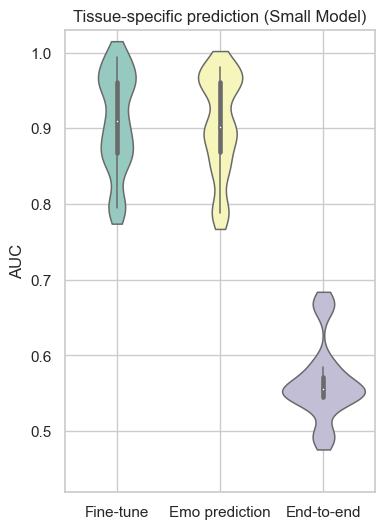

In [5]:
import seaborn as sns
fine = [0.909,0.857,0.967,0.994,0.878,0.795,0.954]
end = [0.492,0.548,0.668,0.558,0.543,0.556,0.585]
pred = [0.902,0.849,0.966,0.981,0.888,0.788,0.956]

sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(4, 6))
#plt.grid(axis='y')
#plt.grid(axis='x')
df = pd.Series(fine, name="Fine-tune").to_frame().join(pd.Series(pred, name="Emo prediction")).join(pd.Series(end, name="End-to-end"))
sns.violinplot(data=df, palette="Set3", bw=.3, cut=1, linewidth=1.1) 
plt.title('Tissue-specific prediction (Small Model)')
plt.ylabel('AUC')
plt.grid(axis='x')
ax.set_ylim(0.42,1.03)
plt.savefig('images/finetune/small-model.png',dpi=300,bbox_inches='tight')
plt.show()

In [6]:
# middle model (finetune)
tissue_list = ['Adipose_Subcutaneous','Artery_Tibial','Brain_Cerebellum','Breast_Mammary_Tissue', 'Colon_Sigmoid',
    'Colon_Transverse','Nerve_Tibial', 'Pancreas', 'Spleen','Testis','Thyroid']
model_size = 'middle'
for tissue in tissue_list:

    print('\n')
    print(tissue)
    y_true = np.load('../model/pred_results_finetune/' + model_size + '_' + tissue + '_' + 'label.npy')
    y_pred = np.load('../model/pred_results_finetune/' + model_size + '_' + tissue + '_' + 'predict.npy')

    y_score = y_pred.argmax(axis=1)       
    test_label = y_true.argmax(axis=1)                         
    y_score_pro = y_pred # (212, 2)
    y_one_hot = y_true
    y_score_one_hot = to_categorical(y_score)

    print('accuracy:{}'.format(accuracy_score(test_label, y_score)))
    print('precision:{}'.format(precision_score(test_label, y_score)))
    print('recall:{}'.format(recall_score(test_label, y_score)))
    print('f1-score:{}'.format(f1_score(test_label, y_score)))
    



Adipose_Subcutaneous
accuracy:0.8360655737704918
precision:0.8529411764705882
recall:0.8529411764705882
f1-score:0.8529411764705882


Artery_Tibial
accuracy:0.8596491228070176
precision:0.8387096774193549
recall:0.896551724137931
f1-score:0.8666666666666666


Brain_Cerebellum
accuracy:0.7428571428571429
precision:0.7222222222222222
recall:0.7647058823529411
f1-score:0.7428571428571428


Breast_Mammary_Tissue
accuracy:0.9666666666666667
precision:0.9333333333333333
recall:1.0
f1-score:0.9655172413793104


Colon_Sigmoid
accuracy:0.96
precision:1.0
recall:0.9375
f1-score:0.967741935483871


Colon_Transverse
accuracy:0.9210526315789473
precision:1.0
recall:0.8571428571428571
f1-score:0.923076923076923


Nerve_Tibial
accuracy:0.875
precision:0.8148148148148148
recall:0.8461538461538461
f1-score:0.830188679245283


Pancreas
accuracy:0.8285714285714286
precision:0.8
recall:0.8
f1-score:0.8000000000000002


Spleen
accuracy:0.7857142857142857
precision:0.875
recall:0.7777777777777778
f1-score

In [7]:
# middle model (end-to-end)
tissue_list = ['Adipose_Subcutaneous','Artery_Tibial','Brain_Cerebellum','Breast_Mammary_Tissue', 'Colon_Sigmoid',
    'Colon_Transverse','Nerve_Tibial', 'Pancreas', 'Spleen','Testis','Thyroid']
model_size = 'middle'
for tissue in tissue_list:

    print('\n')
    print(tissue)
    y_true = np.load('../model/pred_results_e2e/' + model_size + '_' + tissue + '_' + 'label.npy')
    y_pred = np.load('../model/pred_results_e2e/' + model_size + '_' + tissue + '_' + 'predict.npy')

    y_score = y_pred.argmax(axis=1)       
    test_label = y_true.argmax(axis=1)                         
    y_score_pro = y_pred # (212, 2)
    y_one_hot = y_true
    y_score_one_hot = to_categorical(y_score)

    print('accuracy:{}'.format(accuracy_score(test_label, y_score)))
    print('precision:{}'.format(precision_score(test_label, y_score)))
    print('recall:{}'.format(recall_score(test_label, y_score)))
    print('f1-score:{}'.format(f1_score(test_label, y_score)))
    



Adipose_Subcutaneous
accuracy:0.5409836065573771
precision:0.59375
recall:0.5588235294117647
f1-score:0.5757575757575757


Artery_Tibial
accuracy:0.543859649122807
precision:0.5428571428571428
recall:0.6551724137931034
f1-score:0.5937499999999999


Brain_Cerebellum
accuracy:0.5142857142857142
precision:0.0
recall:0.0
f1-score:0.0


Breast_Mammary_Tissue
accuracy:0.5333333333333333
precision:0.0
recall:0.0
f1-score:0.0


Colon_Sigmoid
accuracy:0.72
precision:0.8
recall:0.75
f1-score:0.7741935483870969


Colon_Transverse
accuracy:0.5526315789473685
precision:0.5909090909090909
recall:0.6190476190476191
f1-score:0.6046511627906977


Nerve_Tibial
accuracy:0.5416666666666666
precision:0.36
recall:0.34615384615384615
f1-score:0.35294117647058826


Pancreas
accuracy:0.5714285714285714
precision:0.5
recall:0.4
f1-score:0.4444444444444445


Spleen
accuracy:0.6071428571428571
precision:0.6666666666666666
recall:0.7777777777777778
f1-score:0.717948717948718


Testis
accuracy:0.5
precision:0.592

c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
# middle model (EMO prediction)
tissue_list = ['Adipose_Subcutaneous','Artery_Tibial','Brain_Cerebellum','Breast_Mammary_Tissue', 'Colon_Sigmoid',
    'Colon_Transverse','Nerve_Tibial', 'Pancreas', 'Spleen','Testis','Thyroid']
model_size = 'middle'
for tissue in tissue_list:

    print('\n')
    print(tissue)
    y_true = np.load('../model/pred_results_tissue/' + model_size + '_' + tissue + '_' + 'label.npy')
    y_pred = np.load('../model/pred_results_tissue/' + model_size + '_' + tissue + '_' + 'predict.npy')

    y_score = y_pred.argmax(axis=1)       
    test_label = y_true.argmax(axis=1)                         
    y_score_pro = y_pred # (212, 2)
    y_one_hot = y_true
    y_score_one_hot = to_categorical(y_score)

    print('accuracy:{}'.format(accuracy_score(test_label, y_score)))
    print('precision:{}'.format(precision_score(test_label, y_score)))
    print('recall:{}'.format(recall_score(test_label, y_score)))
    print('f1-score:{}'.format(f1_score(test_label, y_score)))




Adipose_Subcutaneous
accuracy:0.8524590163934426
precision:0.8571428571428571
recall:0.8823529411764706
f1-score:0.8695652173913043


Artery_Tibial
accuracy:0.8421052631578947
precision:0.8333333333333334
recall:0.8620689655172413
f1-score:0.847457627118644


Brain_Cerebellum
accuracy:0.7714285714285715
precision:0.7368421052631579
recall:0.8235294117647058
f1-score:0.7777777777777778


Breast_Mammary_Tissue
accuracy:0.9666666666666667
precision:0.9333333333333333
recall:1.0
f1-score:0.9655172413793104


Colon_Sigmoid
accuracy:0.96
precision:1.0
recall:0.9375
f1-score:0.967741935483871


Colon_Transverse
accuracy:0.9210526315789473
precision:1.0
recall:0.8571428571428571
f1-score:0.923076923076923


Nerve_Tibial
accuracy:0.875
precision:0.7741935483870968
recall:0.9230769230769231
f1-score:0.8421052631578947


Pancreas
accuracy:0.8
precision:0.7857142857142857
recall:0.7333333333333333
f1-score:0.7586206896551724


Spleen
accuracy:0.7857142857142857
precision:0.8333333333333334
recal

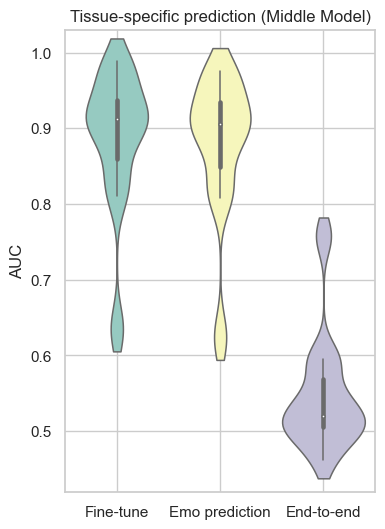

In [9]:
import seaborn as sns
fine = [0.914,0.880,0.839,0.954,0.989,0.974,0.912,0.907,0.810,0.635,0.921]
end = [0.508,0.462,0.504,0.541,0.758,0.546,0.520,0.596,0.592,0.490,0.510]
pred = [0.908,0.873,0.825,0.946,0.976,0.970,0.897,0.906,0.808,0.624,0.923]

sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(4, 6))
#plt.grid(axis='y')
#plt.grid(axis='x')
df = pd.Series(fine, name="Fine-tune").to_frame().join(pd.Series(pred, name="Emo prediction")).join(pd.Series(end, name="End-to-end"))
sns.violinplot(data=df, palette="Set3", bw=.3, cut=1, linewidth=1.1) 
plt.title('Tissue-specific prediction (Middle Model)')
plt.ylabel('AUC')
plt.grid(axis='x')
ax.set_ylim(0.42,1.03)
plt.savefig('images/finetune/middle-model.png',dpi=300,bbox_inches='tight')
plt.show()